# **Section 2: Numpy** 
<a href="https://colab.research.google.com/github/osuranyi/UdemyCourses/blob/main/NumpyStack/Section2_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

Central objects: arrays

What Numpy can be used for?
* Matrix operations (addition, multiplication, etc.)
* Solving linear systems
* Calculating inverse and determinant of matrices
* Generate random numbers

Applications:
* Linear regression
* Logistic regression
* Deep neural networks
* K-means clustering
* Density estimation
* Principal components analysis
* Matrix factorization (recommender systems)
* Support vector machines
* Markov models
* Control systems
* Game theory
* Operation research
* Portfolio optimization

*Remark:* In Numpy, vectors are 1D (not an N x 1 ''2D array'')

## **4. Array vs. lists**

In [ ]:
import numpy as np

In [ ]:
L = [1,2,3]

In [ ]:
A = np.array([1,2,3])

In [ ]:
for e in L:
  print(e)

1
2
3


In [ ]:
for e in A:
  print(e)

1
2
3


In [ ]:
L.append(4)

In [ ]:
L

[1, 2, 3, 4]

Size of an array is fixed, no append method for array:

In [ ]:
#A.append(4)

Lists can be concatenated:

In [ ]:
L + [5]

[1, 2, 3, 4, 5]

Arrays work differently, adds this element to all elements of A, this is called broadcasting:

In [ ]:
A + np.array([4])

array([5, 6, 7])

When adding two same sized array, they are added up element-wise:

In [ ]:
A + np.array([4,5,6])

array([5, 7, 9])

But broadcasting won't work when we try to add two different sized vector (none of them with length one):

In [ ]:
#A + np.array([4,5])

Scalar multiplication works as expected in case of arrays:

In [ ]:
2 * A

array([2, 4, 6])

But list gets repeated two times:

In [ ]:
2 * L

[1, 2, 3, 4, 1, 2, 3, 4]

Using lists to add value to each element:

In [ ]:
L2 = []
for e in L:
  L2.append(e+3)

In [ ]:
L2

[4, 5, 6, 7]

Same with list comprehension:

In [ ]:
L2 = [e + 3 for e in L]

In [ ]:
L2

[4, 5, 6, 7]

This is pretty flexible, e.g. square every list element:

In [ ]:
L2 = []
L2 = [e**2 for e in L]
L2

[1, 4, 9, 16]

But using arrays, this is much easier:

In [ ]:
A**2

array([1, 4, 9])

Functions mostly applied elementwise for arrays:

In [ ]:
np.sqrt(A)

array([1.        , 1.41421356, 1.73205081])

In [ ]:
np.log(A)

array([0.        , 0.69314718, 1.09861229])

In [ ]:
np.tanh(A)

array([0.76159416, 0.96402758, 0.99505475])

List looks like an array, but is a more general data structure. Numpy array exist for mathematics.

## **5. Dot product**

$$
a \cdot b = a^T b = \sum_{d=1}^D a_d b_d
$$

In [ ]:
a = np.array([1,2])
b = np.array([3,4])

Performing dot product "by hand"

In [ ]:
dot = 0
for e, f in zip(a,b):
  dot += e*f
dot

11

In [ ]:
dot = 0
for i in range(len(a)):
  dot += a[i] * b[i]
dot

11

What happens if we use `*` operator?

In [ ]:
a * b

array([3, 8])

Elementwise, but can be used to calculate dot product:

In [ ]:
np.sum(a * b)

11

In [ ]:
(a * b).sum()

11

Using the dedicated `dot` function:

In [ ]:
np.dot(a,b)

11

Also works as an instance method:

In [ ]:
a.dot(b)

11

The symbol `@` also performs the dot product:

In [ ]:
a @ b

11

Alternative definition of dot product:
$$
a^T b = \|a\| \, \|b\| \cos\theta
$$

In [ ]:
amag = np.sqrt(a@a)
amag

2.23606797749979

In [ ]:
np.linalg.norm(a)

2.23606797749979

In [ ]:
cosangle = a@b / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
angle = np.arccos(cosangle)
angle

0.17985349979247847

##  **6. Speed test**

In this part, we will measure how much faster dot product is in numpy. First we define two vectors:

In [ ]:
from datetime import datetime

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

Then create a function for the ''by hand'' calculation:

In [ ]:
def slow_dot_product(a,b):
  result = 0
  for e,f in zip(a,b):
    result += e*f
  return result

Also a function for list comprehension dot product:

In [ ]:
def list_comprehension_dot_product(a,b):
  result = 0
  result = sum(e*f for e,f in zip(a,b))
  return result

Now, timing this function and the built-in dot product:

In [ ]:
t0 = datetime.now()
for t in range(T):       # running dot product T times to be more accurate
  slow_dot_product(a,b)
dt1 = datetime.now()-t0

t0 = datetime.now()
for t in range(T):
  list_comprehension_dot_product(a,b)
dt2 = datetime.now()-t0

t0 = datetime.now()
for t in range(T):
  a.dot(b)
dt3 = datetime.now()-t0


print("List comprehension is faster by this factor:",dt1.total_seconds() / dt2.total_seconds())
print("Numpy method is faster by this factor:",dt1.total_seconds() / dt3.total_seconds())

List comprehension is faster by this factor: 2.0859306026714144
Numpy method is faster by this factor: 151.81111643890353


##  **7. Matrices**

There is a `numpy.matrix` object, but not recommended to use. Using array is recommended instead, because it can be any dimension. Exception is sparse matrix.

Creating matrix with list of lists:

In [ ]:
L = [[1,2],[3,4]]
L

[[1, 2], [3, 4]]

Get first row:

In [ ]:
L[0]

[1, 2]

Access element:

In [ ]:
L[0][1]

2

Using numpy.array:

In [ ]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

Accessing elements in numpy.array:

In [ ]:
A[0][1]
A[0,1]

2

Now we can retrieve a column:

In [ ]:
A[:,0]

array([1, 3])

Transpose of matrix:

In [ ]:
A.T

array([[1, 3],
       [2, 4]])

Element-wise exponentiation (and other function):

In [ ]:
np.exp(A)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

Also, list can be passed, it will be converted to `np.array` automatically:

In [ ]:
np.exp(L)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

Matrix multiplication (inner dimensions must match!):

In [ ]:
B = np.array([[1,2,3],[4,5,6]])

In [ ]:
A.dot(B)

array([[ 9, 12, 15],
       [19, 26, 33]])

Determinant:

In [ ]:
np.linalg.det(A)

-2.0000000000000004

Inverse:

In [ ]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Checking if this is really the inverse:

In [ ]:
np.linalg.inv(A).dot(A)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

Trace:

In [ ]:
np.trace(A)

5

Extracting diagonal elements into a vector:

In [ ]:
np.diag(A)

array([1, 4])

Create a diagonal matrix from vector uses the same function - this is overloaded:

In [ ]:
np.diag([1,4])

array([[1, 0],
       [0, 4]])

Eigenvalues and eigenvectors:

In [ ]:
Lam, V = np.linalg.eig(A)
Lam
V

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

Check this in the eigen equation:

In [ ]:
V[:,0] * Lam[0] == A @ V[:,0]

array([ True, False])

This should have been `[True,True]`. The reason is numerical precision:

In [ ]:
V[:,0] * Lam[0], A @ V[:,0]

(array([ 0.30697009, -0.21062466]), array([ 0.30697009, -0.21062466]))

We should use `np.allclose(u,v)` function instead, which checks whether the elements of u and v within a small $\varepsilon$ distance:

In [ ]:
np.allclose(V[:,0] * Lam[0], A @ V[:,0])

True

We can also check all eigenvalues/vectors using matrix notification:

In [ ]:
np.allclose(V @ np.diag(Lam), A @ V)

True

For symmetric matrix, it is better to use `numpy.linalg.eigh`

## **8. Solving linear systems**

Very common problem in all areas of science and engineering. Example problem:
\begin{align}
x_1 + x_2 &= 2200 \\
1.5x_1 + 4x_2 &= 5500
\end{align}

This could be written as a matrix equation:
$$
\mathbf{A} \mathbf{x} = \mathbf{b}
$$

In [ ]:
A = np.array([[1,1],[1.5,4]])
b = np.array([2200,5500])

In theory, this could be solved by inverting $\mathbf{A}$:
$$ \mathbf{x} = \mathbf{A}^{-1} \mathbf{b} $$
But in practice, this is really inefficient in most cases. There are better algorithms, such as Gauss elimination. There is a built in function in numpy to solve linear systems:

In [ ]:
np.linalg.solve(A, b)

array([1320.,  880.])

## **9. Generating data**

Sometimes we need to generate large amount of data. E.g.: initializing neural networks, generating synthetic data.

Array of all zeros:

In [ ]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

Similarly an array of ones:

In [ ]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

Array of any numbers, eg.: 10:

In [ ]:
10 * np.ones((2,3))

array([[10., 10., 10.],
       [10., 10., 10.]])

Create identity matrix:

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**Generating random variables**

In [ ]:
np.random.random()

0.9779916485399053

In [ ]:
np.random.random((2,3))

array([[0.55849277, 0.27966356, 0.13085849],
       [0.50334027, 0.79638029, 0.32435043]])

Generating data according to normal distribution:

In [ ]:
np.random.randn(2,3)

array([[-1.56575196, -0.51141387,  1.8500876 ],
       [-0.40062926,  0.44735882,  0.89649457]])

(This does not accept a tuple.)

Mean of generated numbers:

In [ ]:
R = np.random.randn(10000)

In [ ]:
R.mean()

0.01004262056169826

In [ ]:
np.mean(R)

0.01004262056169826

Variance and standard deviation:

In [ ]:
R.var()

1.0005825340142942

In [ ]:
R.std()

1.000291224601263

Matrix of normal variables:

In [ ]:
R = np.random.randn(10000,3)

Calculate mean of each column -- use `axis=0` (similarly `axis=1` for mean of rows):

In [ ]:
R.mean(axis=0)

array([ 0.01245914,  0.01905355, -0.00048789])

Covariance:

In [ ]:
np.cov(R)

array([[ 0.83243669, -0.4410696 ,  0.29350925, ...,  0.54521083,
         1.40378507, -1.29924381],
       [-0.4410696 ,  0.45332407, -0.19683155, ...,  0.6645652 ,
        -0.84166209,  0.64875031],
       [ 0.29350925, -0.19683155,  0.11126055, ...,  0.0128764 ,
         0.51337067, -0.4506405 ],
       ...,
       [ 0.54521083,  0.6645652 ,  0.0128764 , ...,  4.49630432,
         0.49457237, -1.02312081],
       [ 1.40378507, -0.84166209,  0.51337067, ...,  0.49457237,
         2.41088837, -2.17331675],
       [-1.29924381,  0.64875031, -0.4506405 , ..., -1.02312081,
        -2.17331675,  2.03498473]])

In [ ]:
np.cov(R).shape

(10000, 10000)

Cov function treats each column as a vector of observations. Thus we need to transpose first:

In [ ]:
np.cov(R.T)

array([[ 0.9975977 , -0.00200025, -0.0259387 ],
       [-0.00200025,  1.00530313,  0.01243319],
       [-0.0259387 ,  0.01243319,  1.01928024]])

Now this has the correct dimensions. Another possibile solution is to use the `rowvar=False` option.

In [ ]:
np.cov(R,rowvar=False)

array([[ 0.9975977 , -0.00200025, -0.0259387 ],
       [-0.00200025,  1.00530313,  0.01243319],
       [-0.0259387 ,  0.01243319,  1.01928024]])

Generating random integers

In [ ]:
np.random.randint(0,10,size=(3,3))

array([[2, 0, 1],
       [1, 7, 0],
       [5, 0, 1]])

Choose randomly form a set of numbers (practically an 1D array):

In [ ]:
np.random.choice(10,size=(3,3))

array([[5, 9, 2],
       [6, 2, 4],
       [1, 8, 7]])

In [ ]:
np.random.choice([0,2,4],size=(3,3))

array([[4, 2, 2],
       [2, 0, 2],
       [2, 4, 2]])

## **10. Numpy exercise**

* Do a speed test for matrix multiplication
* Compare for loops using lists vs. numpy array operations
* *Bonus:* how does time increase with respect to input size?

First, we generate two random matrices of size $100 \times 100$:

In [ ]:
#A = np.random.randn(100,99)
#B = np.random.randn(99,100)

A = [[1,2],[3,4],[5,6]]    # 3 x 2
B = [[1,2,3],[4,5,6]]  # 2 x 3

Then, the for loop multiplication using lists is implemented as a function:

In [ ]:
def list_matrix_multiplication(A,B):
  
  # Check whether the inner dimension are matched
  if len(A[0]) != len(B):
    raise Exception("Exception: matrix inner dimensions must agree!")
  
  # Calculate the number of rows and columns in the output matrix
  n_rows = len(A)
  n_cols = len(B[0])

  # Using list comprehension to initialize result, which will be a list of lists
  C = [[0 for i in range(n_cols)] for i in range(n_rows)]

  for i in range(n_rows):
    for j in range(n_cols):
      for k in range(len(A[0])):
        C[i][j] += A[i][k]*B[k][j]

  return C


In [ ]:
C = list_matrix_multiplication(A,B)
C

[[9, 12, 15], [19, 26, 33], [29, 40, 51]]

In order to cross-check, the product is also calculated using Numpy:

In [ ]:
np.dot(A,B)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

Which is equal to the version calculated using solely lists and for loops.

Next, we will time these two operations, by measuring the multiplication of $100 \times 100$ matrices:

In [ ]:
from datetime import datetime

A = np.random.randn(100,100)
B = np.random.randn(100,100)
T = 10

# First time T=10 calls of the list version
t0 = datetime.now()
for t in range(T):
  list_matrix_multiplication(A,B)
dt1 = datetime.now() - t0

# Then similarly time the numpy version
t0 = datetime.now()
for t in range(T):
  np.dot(A,B)
dt2 = datetime.now() - t0

print("The numpy method is faster by a factor of",dt1/dt2)

The numpy method is faster by a factor of 574.3857286432161


We found that numpy is much more faster! \\
Finally, the bonus exercise: checking the dependence of the calculation speed on the size of the matrix:

In [ ]:
import matplotlib.pyplot as plt

sizes = range(3,150,2)
times = []
T = 10

for s in sizes:

  C = np.random.randn(s,s)
  D = np.random.randn(s,s)

  t0 = datetime.now()
  for t in range(T):
    list_matrix_multiplication(C,D)
  dt1 = datetime.now() - t0

  t0 = datetime.now()
  for t in range(T):
    np.dot(C,D)
  dt2 = datetime.now() - t0

  times.append(dt1/dt2)

plt.plot(sizes,times)

## **Extra: Linear regression using numpy**

Let us have an n-dimensional feature space. Feature vectors and corresponding predicted values are denoted by $(\mathbf{x}_i,y_i)$. Assuming a linear relationship, we might try to model the data with the following relationship:
$$
y_i = \theta^T \mathbf{x}_i + \theta_0, \quad\quad \text{for all $i$}
$$
where $\theta$ is a vector of parameters: $\theta = (\theta_1,\theta_2,\dots)$, and $\theta_0$ is another parameter called the intercept. This equation can be written in a more compact form if we redefine $\mathbf{x}_i$ and $\theta$ as:
\begin{align}
\mathbf{x}_i \rightarrow \mathbf{x}_i =
\left[
\begin{matrix}
1 \\ x_{i1} \\ x_{i2} \\ \dots
\end{matrix}
\right],
\theta \rightarrow \theta =
\left[
\begin{matrix}
\theta_0 \\ \theta_1 \\ \theta_2 \\ \dots
\end{matrix}
\right],
\end{align}
and introduce the following new notations:
\begin{align}
\mathbf{X} &=
\left[\begin{matrix}
 \mathbf{x}_1^T \\
 \mathbf{x}_2^T \\
\dots
\end{matrix}\right],
\mathbf{y} = 
\left[\begin{matrix}
 y_1 \\
 y_2 \\
\dots
\end{matrix}\right].
\end{align}
Then our linear model becomes:
$$
\mathbf{y} = \mathbf{X}\theta.
$$
Of course, this equation does not hold exactly for a set of real data, because of noise, measurement uncertainties, etc. In order to find the $\theta$ parameters that fits our model the best, we should minimize the sum of mean squared errors:
$$
\min_\theta (\mathbf{y}-\mathbf{X}\theta)^T (\mathbf{y}-\mathbf{X}\theta).
$$
The optimum can be calculated analytically, if we take the derivatives of this above equation:
$$
2(-\mathbf{X}^T)(\mathbf{y}-\mathbf{X}\theta) = 0,
$$
which after rearranging, becomes:
$$
\mathbf{X}^T\mathbf{X} \theta = \mathbf{X}^T \mathbf{y},
$$
which is a linear system of equations for $\theta$. This can be solved by either inverting the $\mathbf{X}^T\mathbf{X}$ matrix or by Gauss elimination.

### A. 1-dimensional linear regression

First, we generate a set of data. The $x$ values are uniformly distributed between `x_i` and `x_f`:

In [130]:
x_i = -10
x_f = 10
N = 100

x = np.random.uniform(x_i,x_f,size=N)

The $y$ values are sampled from a normal distribution with variance `sigma` and mean `a*x + b`. This is generated from a standard normal distribution as $\mathcal{N}(0,1) \cdot \sigma + (ax+b)$

In [137]:
a = 2.3
b = 0.6
sigma = 5

y = sigma*np.random.randn(N) + a*x+b

Here, the values of `a` and `b` represent the *truth*, which we want to infer using linear regression. Now, let's plot this data

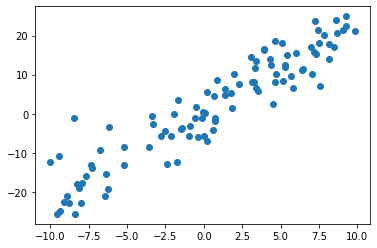

In [138]:
plt.scatter(x,y);

The next step is to construct the numpy corresponding to $\mathbf{X}$. (*Remark:* $\mathbf{y}$ is good as is):

In [139]:
X = np.ones((N,2))
X[:,1] = x
X

array([[ 1.        , -8.22787396],
       [ 1.        ,  9.05489401],
       [ 1.        ,  3.12310926],
       [ 1.        ,  3.42717022],
       [ 1.        , -3.59350064],
       [ 1.        , -3.40036865],
       [ 1.        , -6.35087876],
       [ 1.        , -7.95539028],
       [ 1.        , -0.89237354],
       [ 1.        ,  5.31750419],
       [ 1.        ,  0.61846565],
       [ 1.        ,  5.42495493],
       [ 1.        , -1.39660447],
       [ 1.        ,  7.50804413],
       [ 1.        ,  8.48565935],
       [ 1.        ,  4.39629606],
       [ 1.        , -0.51377462],
       [ 1.        ,  7.81450112],
       [ 1.        , -8.92443255],
       [ 1.        ,  5.29877499],
       [ 1.        , -6.466442  ],
       [ 1.        ,  7.28362339],
       [ 1.        , -1.92803971],
       [ 1.        , -7.32384586],
       [ 1.        , -9.58245262],
       [ 1.        , -7.6487615 ],
       [ 1.        ,  3.92625567],
       [ 1.        , -0.95018228],
       [ 1.        ,

Finally, let's solve the linear system!

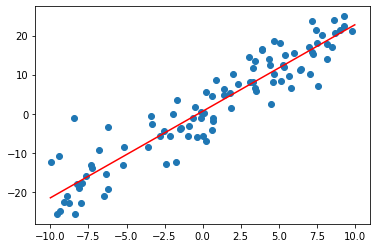

In [145]:
A = X.T @ X
z = X.T @ y

theta = np.linalg.solve(A,z)

x_lin = np.linspace(x_i,x_f,1000)

plt.scatter(x,y)
plt.plot(x_lin,theta[0]+theta[1]*x_lin,c='r');